In [2]:

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier


In [3]:
df= pd.read_csv('C:/Users/HP/OneDrive/Desktop/prodigy/archive/Mall_Customers.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
from tabulate import tabulate
data = [
    ["Gender", "Male/Female"],
    ["Age", "18-70"],
    ["Annual Income", "In miles"],
    ["Spending Score", "1-100, is something you assign to the customer"]
]
headers = ["Abbreviation", "Full Form"]

table = tabulate(data, headers, tablefmt="pipe")
print(table)

| Abbreviation   | Full Form                                      |
|:---------------|:-----------------------------------------------|
| Gender         | Male/Female                                    |
| Age            | 18-70                                          |
| Annual Income  | In miles                                       |
| Spending Score | 1-100, is something you assign to the customer |


In [13]:
df1 = df


In [14]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [15]:
label_encoder = LabelEncoder()
df1['Gender'] = label_encoder.fit_transform(df1['Gender'])

In [17]:
df_nogender = df1.drop(columns = ["CustomerID","Gender"])

In [18]:
df_nogender.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [25]:
from sklearn.cluster import KMeans

clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(df_nogender)
labels = k_means.labels_


In [26]:
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [27]:
df_nogender["Clus"] = labels
df_nogender.head(5)

,Age,Annual Income (k$),Spending Score (1-100),Clus
0,19,15,39,2
1,21,15,81,2
2,20,16,6,2
3,23,16,77,2
4,31,17,40,2


In [28]:
df_nogender.groupby("Clus").mean()

,Age,Annual Income (k$),Spending Score (1-100)
Clus,,,
0,40.394737,87.000000,18.631579
1,32.692308,86.538462,82.128205
2,40.325203,44.154472,49.829268


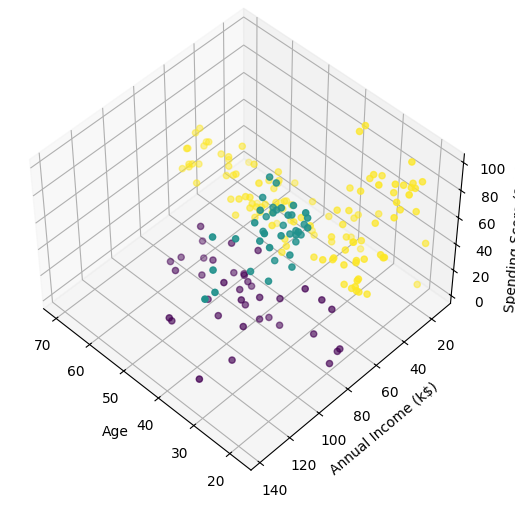

In [29]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Creating the figure and 3D axis
fig = plt.figure(1, figsize=(8, 6))
plt.clf()

# Syntax for 3-D projection
ax = fig.add_subplot(111, projection='3d')

# Setting elevation and azimuthal angles
ax.view_init(elev=48, azim=134)

plt.cla()
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

# Assuming df_nogender is a DataFrame and needs to be converted to a numpy array
df_nogender_array = df_nogender.to_numpy()

ax.scatter(df_nogender_array[:, 0], df_nogender_array[:, 1], df_nogender_array[:, 2], c=labels.astype(float))

plt.show()


Text(0, 0.5, 'Annual Income (k$)')

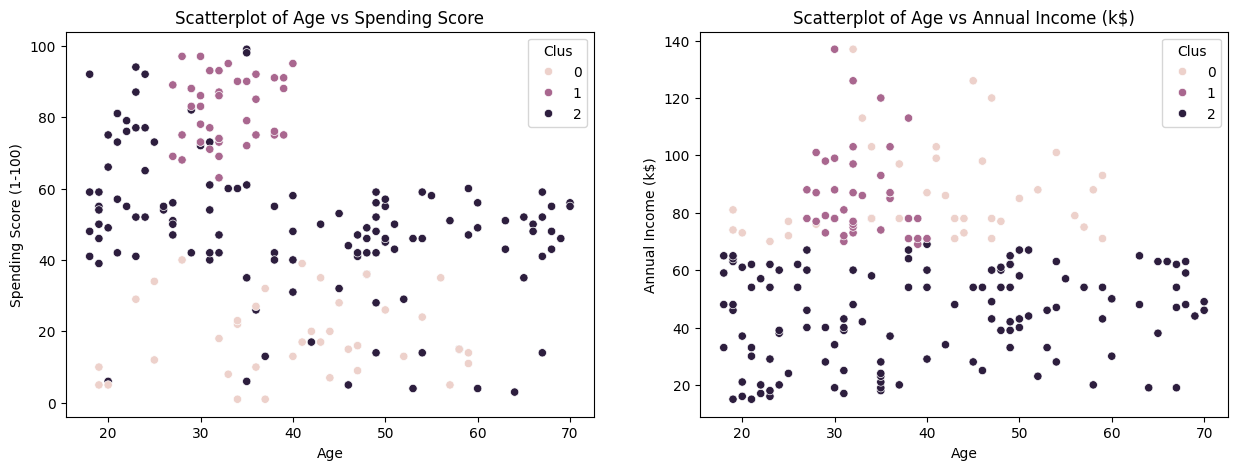

In [30]:
df_nogender['Clus'] = labels

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

ax1 = sns.scatterplot(df_nogender, x="Age", y="Spending Score (1-100)", ax = axes[0], hue = "Clus")
axes[0].set_title("Scatterplot of Age vs Spending Score") #First plot
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Spending Score (1-100)")

ax1 = sns.scatterplot(df_nogender, x="Age", y="Annual Income (k$)", ax = axes[1], hue = "Clus")
axes[1].set_title("Scatterplot of Age vs Annual Income (k$)") #Second plot
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Annual Income (k$)")


Text(0, 0.5, 'Spending Score (1-100)')

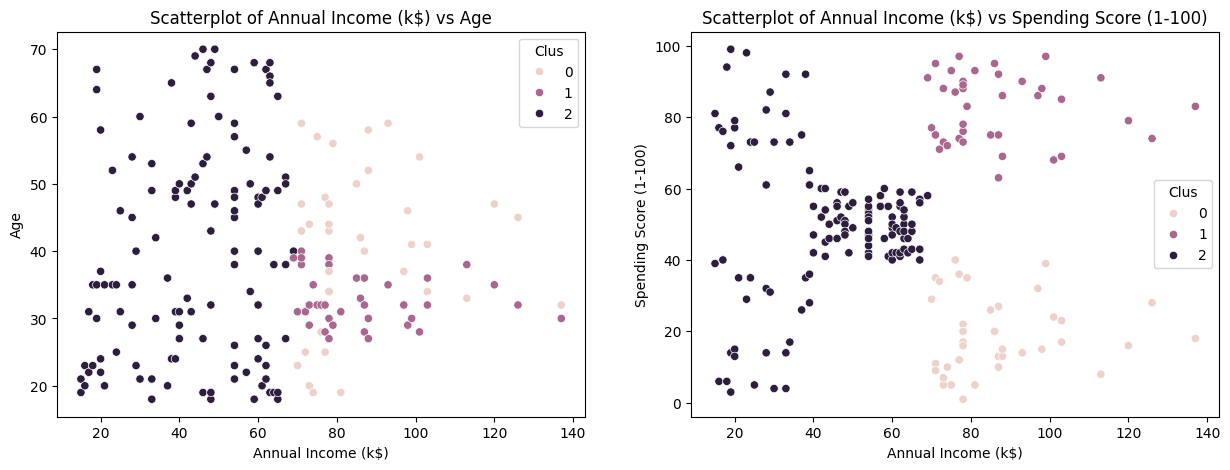

In [31]:
df_nogender['Clus'] = labels

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

ax1 = sns.scatterplot(df_nogender, x="Annual Income (k$)", y="Age", ax = axes[0], hue = "Clus")
axes[0].set_title("Scatterplot of Annual Income (k$) vs Age") #First plot
axes[0].set_xlabel("Annual Income (k$)")
axes[0].set_ylabel("Age")

ax1 = sns.scatterplot(df_nogender, x="Annual Income (k$)", y="Spending Score (1-100)", ax = axes[1], hue = "Clus")
axes[1].set_title("Scatterplot of Annual Income (k$) vs Spending Score (1-100)") #Second plot
axes[1].set_xlabel("Annual Income (k$)")
axes[1].set_ylabel("Spending Score (1-100)")

In [32]:
from tabulate import tabulate
data = [
    ["0", "Have more high spending score and average annual income, their age is between 30"],
    ["1", "People in the middle and have mid age"],
    ["2", "The more young with less spending score"],
]
headers = ["Categorie", "Value"]

table = tabulate(data, headers, tablefmt="pipe")
print(table)

|   Categorie | Value                                                                            |
|------------:|:---------------------------------------------------------------------------------|
|           0 | Have more high spending score and average annual income, their age is between 30 |
|           1 | People in the middle and have mid age                                            |
|           2 | The more young with less spending score                                          |
